In [43]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

Создаем наше распредение

In [73]:
array = np.random.normal(-100, 100, 1000)

Запишем необходимые константы относящиеся к нашему распределению

In [74]:
N = len(array)  # объем выборки
maxx = np.max(array)  # максимальное значение
minn = np.min(array)  # минимальное значение
std = np.std(array)  # среднее квадратичное отклонение
mean = np.mean(array)  # среднее по выборке
print(N, maxx, minn, std, mean)

1000 215.902531013329 -371.54072111033236 99.65896941491043 -100.0623184665231


Частоты и гистограмма распределения

In [75]:
n = int(1 + np.log2(N))#колво интервалов
l = (maxx - minn) / n #Ширина каждоого интервала
print(f'Кол-во: {n}\nШирина: {l}')
intervals = np.arange(minn, maxx+l, l)
for i in range(n):
    print(f'От {intervals[i]} до {intervals[i+1]}')


Кол-во: 10
Ширина: 58.74432521236613
От -371.54072111033236 до -312.79639589796625
От -312.79639589796625 до -254.05207068560014
От -254.05207068560014 до -195.30774547323404
От -195.30774547323404 до -136.56342026086793
От -136.56342026086793 до -77.81909504850182
От -77.81909504850182 до -19.074769836135715
От -19.074769836135715 до 39.66955537623039
От 39.66955537623039 до 98.4138805885965
От 98.4138805885965 до 157.1582058009626
От 157.1582058009626 до 215.9025310133287


[ 18  44 126 161 229 222 110  67  20   3]
1000


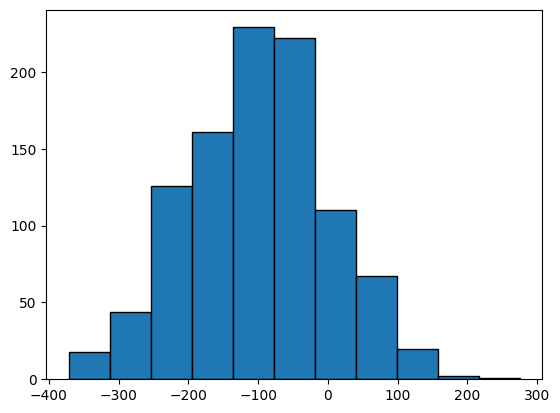

In [76]:
#Расчитаем частоту для каждого интервала
freq, _ = np.histogram(array, bins=n, density=False)
print(freq)
print(sum(freq))
plt.hist(array, bins=np.arange(minn, maxx+l, l), edgecolor='black')
plt.show()

Выдвигаем гипотезу: Наши данные имею нормальное распределение

In [77]:
#Для каждого интервала найдем вероятности попадания в аши интервалы:
def prop(a, b, mu, std, i):
    if i == 0:
        p = stats.norm.cdf(b, loc=mu, scale=std)
    elif i == n - 1:
        p = 1 - stats.norm.cdf(a, loc=mu, scale=std)
    else:
        p = stats.norm.cdf(b, loc=mu, scale=std) - stats.norm.cdf(a, loc=mu, scale=std)
    return p

# Расчитаем 
pj = []
for i in range(n):
    pj.append(prop(intervals[i], intervals[i+1], mean, std, i))
print(pj)
print(sum(pj))
mj = np.array(pj) * N
print(mj) #вероятное количество элементов в интервалах
print(sum(mj))

[0.016396011469419665, 0.04475692391479943, 0.10845555316399944, 0.18747701994338267, 0.23122199414515737, 0.20348221923792975, 0.12776763375571243, 0.057232625904841905, 0.018284393060191806, 0.004925625404565537]
1.0
[ 16.39601147  44.75692391 108.45555316 187.47701994 231.22199415
 203.48221924 127.76763376  57.2326259   18.28439306   4.9256254 ]
1000.0


Вычисляем хи-квадрат

In [78]:
hisqrt = (freq - mj) ** 2 / mj
print(sum(hisqrt))

13.505158415162981


Вычислим стат критерий для нашей гипотезы

In [82]:
k = n - 1 # колво степеней свободы
alpha = 0.05
crit_chi2 = stats.chi2.ppf(1 - alpha, k)
print(crit_chi2)
p_value = stats.chi2.sf(crit_chi2, k)
print(p_value)

16.918977604620448
0.05000000000000007


Итог: с вероятностью 0.05 при отвержении нашей гипотезы мы ошибемся, что получается, что наши данные распределены нормально